# **Part 1**

[0.5 marks] In the transaction dataset used in the tutorial presented above, for a support threshold of 40%, is the itemset  {{Kidney Beans}, {Eggs}, {Yogurt}}  considered frequent?

In [2]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [3]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)

In [4]:
import pandas as pd

df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True) 

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) # length of each frozenset
print('Frequent 3-itemsets:')
display(frequent_itemsets[frequent_itemsets['length'] == 3])

Frequent 3-itemsets:


,support,itemsets,length
21,0.4,"(Eggs, Kidney Beans, Milk)",3
22,0.4,"(Nutmeg, Eggs, Kidney Beans)",3
23,0.6,"(Onion, Eggs, Kidney Beans)",3
24,0.4,"(Yogurt, Eggs, Kidney Beans)",3
25,0.4,"(Onion, Eggs, Nutmeg)",3
26,0.4,"(Yogurt, Eggs, Nutmeg)",3
27,0.4,"(Onion, Eggs, Yogurt)",3
28,0.4,"(Yogurt, Kidney Beans, Milk)",3
29,0.4,"(Onion, Kidney Beans, Nutmeg)",3
30,0.4,"(Yogurt, Kidney Beans, Nutmeg)",3


[0.5 marks] Implement a function that receives a binary DataFrame of transactions and an association rule (represented by a frozenset of antecedents and a frozenset of consequents). This function should return the corresponding Kulczynski measure.

[0.5 marks] Implement a function that receives a binary DataFrame of transactions and an association rule (represented by a frozenset of antecedents and a frozenset of consequents). This function should return the corresponding imbalance ratio.

answer: our function returns both Kulczynski measure and imbalance ratio

In [7]:
from mlxtend.frequent_patterns import apriori


def calculate_measures(bin_dataframe, target_rule):
  """
  bin_dataframe: binary dataframe of transactions with columns
  """
  frequent_itemsets = apriori(df, use_colnames=True)

  support = {}
  for _, row in frequent_itemsets.iterrows():
    support[row['itemsets']] = row['support']

  antecedents, consequents = target_rule
  supp_consequents = support[consequents]
  supp_antecedents = support[antecedents]

  listoffrozensets = [antecedents, consequents]
  itemsets_union = frozenset().union(*listoffrozensets)
  rule_support = support[itemsets_union]

  # calculate Kulczynski measure and imbalance ratio
  kulc = (rule_support / supp_consequents + rule_support / supp_antecedents) / 2
  ir = abs((supp_antecedents - supp_consequents) / (supp_antecedents + supp_consequents - rule_support))
  
  return kulc, ir

test the function

In [8]:
target_rule = (frozenset(['Onion', 'Eggs']),frozenset(['Kidney Beans']))
rule_Kulczynski_rate, rule_imbalance_ratio = calculate_measures(df, target_rule)
print(rule_Kulczynski_rate, 'rule_Kulczynski_rate')
print(rule_imbalance_ratio, 'rule_imbalance_ratio')

0.8 rule_Kulczynski_rate
0.4 rule_imbalance_ratio


# **PART 2**

[1 mark] The monthly rainfall in the London borough of Tower Hamlets in 2019 had the following amount of precipitation (measured in mm, values from January-December 2018): {22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82}. Assuming that the data is based on a normal distribution, identify outlier values in the above dataset using the maximum likelihood method.

In [ ]:
import numpy as np
monthly_rainfall = [22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82]
rainfall = np.array(monthly_rainfall)
print(rainfall.mean(), rainfall.std())

22.534999999999997 6.130045540885756


In [ ]:
mean_distance = rainfall - rainfall.mean()
print(abs(mean_distance))

[ 0.395  1.845  3.215  1.305  2.805 19.285  1.015  5.745  1.185  0.115
  4.295  1.285]


In [ ]:
std_measure = mean_distance / rainfall.std()
print(abs(std_measure))

[0.06443672 0.30097656 0.52446592 0.21288586 0.45758224 3.14597989
 0.16557789 0.93718716 0.19331015 0.01876006 0.70064732 0.20962324]


[1 mark] Using the house prices dataset from Section 3 of this lab notebook, use PCA to obtain the first 2 principal components (remember that PCA should only be applied on the input attributes, and not the target; remember also to normalise using z-scores for better results). Then, perform outlier detection on the pre-processed dataset using the k-nearest neighbours approach using k=2. Display a scatterplot of the two principal components, where each object is colour-coded according to the computed outlier score.

In [1]:
from pandas import read_csv

# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)

# Extracting the values from the dataframe
data = df.values

# Split dataset into input and output elements
X, y = data[:, :-1], data[:, -1]

# Summarize the shape of the dataset
print(X.shape, y.shape)

(506, 13) (506,)


In [2]:
from scipy import stats
X_norm = stats.zscore(X, axis=1)
X_norm.shape

(506, 13)

In [5]:
from sklearn.decomposition import PCA
import pandas as pd

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_norm)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  506 non-null    float64
 1   principal component 2  506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

# Implement a k-nearest neighbour approach using k=2 neighbours
k = 2
nbrs = NearestNeighbors(n_neighbors=k, metric=distance.euclidean).fit(principalDf.values)
distances, indices = nbrs.kneighbors(principalDf.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,k-1]

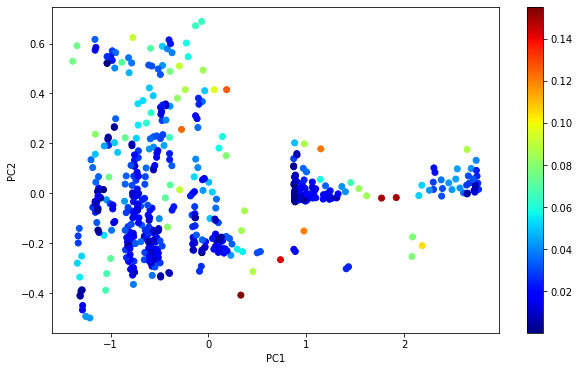

In [9]:
# Plot 3D scatterplot of outlier scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=outlier_score,cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(p)
plt.show()

[1 mark] Consider the absenteeism.csv data set.

a. The "ID" column is the employee identifier. Consider the number of absences for each employee and find outliers among those values. Use Grubb's test with  𝛼=0.1  to find said outliers.

In [36]:
import pandas as pd
df = pd.read_csv("absenteeism.csv", header="infer", delimiter=";")

In [37]:
df.shape

(740, 21)

In [38]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

First count the number of rows for each employee ID

In [39]:
employee_absence = df['ID'].value_counts()
employee_absence.head()

3     113
28     76
34     55
22     46
20     42
Name: ID, dtype: int64

In [40]:
print(employee_absence.min(),'min')
print(employee_absence.max(),'max')

1 min
113 max


Then calculate the z-score for each value_count

In [42]:
from scipy import stats

z_score = stats.zscore(employee_absence)
z_score.head()

3     3.956771
28    2.373112
34    1.474278
22    1.089063
20    0.917857
Name: ID, dtype: float64

The squared upper critical value at a significance of  𝛼/(2𝑁)  with  𝑁−2  degrees of freedom is :

In [43]:
from scipy.stats import t
N = 36
alpha=0.1
t2 = t.interval( 1-alpha/N, N-2)[1]**2
t2

10.404726495863276

In [ ]:
import math
Grubb_value = ( (N-1) / math.sqrt(N) ) * math.sqrt(t2 / (N-2+t2))
print(Grubb_value)

2.8236933338407426


check that which employee ID has the z_score of more than 2.8236933338407426

In [ ]:
z_score[z_score>=Grubb_value]

3    3.956771
Name: ID, dtype: float64

Epoloyee with ID of 3 is the outlier

In [44]:
employee_absence.at[3]

113

b. The attribute "Reason for absence" is categorical. The label "26" corresponds to "Unjustified absence". Again, consider the number of absences for each employee. However, now you must find contextual outliers among cases of unjustified absences, again using Grubb's test with 𝛼=0.1.

In [47]:
df_unjustified = df[df['Reason for absence']==26]

In [ ]:
df_unjustified.info()

In [49]:
employee_unjustified_absence = df_unjustified['ID'].value_counts()

In [52]:
employee_unjustified_absence.size

11

In [58]:
print(employee_unjustified_absence.min(),'min')
print(employee_unjustified_absence.max(),'max')

1 min
9 max


In [53]:
from scipy import stats

z_score = stats.zscore(employee_unjustified_absence)
z_score.head()

5     2.527271
11    1.263635
20    0.421212
34    0.000000
1    -0.421212
Name: ID, dtype: float64

In [54]:
from scipy.stats import t
N = 11
alpha=0.1
t2 = t.interval( 1-alpha/N, N-2)[1]**2
t2

10.952902305305955

In [55]:
import math
Grubb_value = ( (N-1) / math.sqrt(N) ) * math.sqrt(t2 / (N-2+t2))
print(Grubb_value)

2.2339077064682877


In [56]:
z_score[z_score>=Grubb_value]

5    2.527271
Name: ID, dtype: float64

In [59]:
employee_unjustified_absence.at[5]

9